# CIFAR-10 -> Designed

The CIFAR-10 dataset consists of

60000 32x32 colour images in 10 classes

with 6000 images per class

There are 50000 training images and 10000 test images. 

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [2]:
from cifar10_read import *

### parameters

In [3]:
TRAIN_SIZE = 50000
TEST_SIZE = 10000
BATCH_SIZE = 128

### ops for settings

layer1: 32x32x3

In [4]:
# Graph input:
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name='InputData')
# Graph input:
x_preprocessed = tf.placeholder(tf.float32, [None, 32, 32, 3], name='InputData_preprocessed')
# 0-9 digits recognition => 10 classes
y_ = tf.placeholder(tf.float32, [None, 10], name='LabelData')
# training ? testing
status = tf.placeholder(tf.bool, [], name='status')
print(x.shape)
print(y_.shape)

(?, 32, 32, 3)
(?, 10)


In [5]:
learning_rate = tf.placeholder(tf.float32, [], name='learning_rate')
weight_stddev = tf.placeholder(tf.float32, [], name='weight_stddev')

### functions to initialize varibles

In [6]:
# shortcut for b(bias)
def bias_variable(shape):
    initial = tf.constant(0.0, shape=shape)
    return tf.Variable(initial)
# shortcut for convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# shortcut for convolution layer
def convlayer(input_layer,name,shape,status):
    W_conv_layer = tf.get_variable('W_' + name, shape=shape,initializer=tf.contrib.layers.xavier_initializer())
    b_conv_layer = bias_variable([shape[-1]])
    conv_layer = conv2d(input_layer, W_conv_layer)+b_conv_layer
    conv_layer = tf.layers.batch_normalization( inputs=conv_layer, axis=-1, momentum=0.9, epsilon=0.001, 
                                               center=True, scale=True, training = status, name = name + '_bn')
    conv_layer = tf.nn.relu(conv_layer)
    print(conv_layer.shape)
    return conv_layer
# shortcut for max_pooling layer
def max_pool(conv):
    return tf.nn.max_pool(conv,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
# shortcut for fully_connected layer
def fclayer(input_layer,name,shape,keep_prob):
    W_fclayer = tf.get_variable("W_"+name, shape=shape,initializer=tf.contrib.layers.xavier_initializer())
    b_fclayer = bias_variable([shape[-1]])
    fclayer = tf.nn.relu(tf.matmul(input_layer, W_fclayer)+b_fclayer)
    fclayer = tf.nn.dropout(fclayer, keep_prob)
    print(fclayer.shape)
    return fclayer
# shortcut for randomnize training set
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
# shortcut for dummy label
def labelconvert(label,num_of_type=10):
    label = label.reshape([-1,1])
    label=np.tile(label,(1,num_of_type))
    label_true = np.tile(np.arange(num_of_type),(label.shape[0],1))
    return np.equal(label,label_true)

### Preprocessing Layer

In [7]:
#preprocessing ops for testing
preprocessing = tf.map_fn(lambda img: tf.image.per_image_standardization(img), x)
#preprocessing ops for training
distorted_image = tf.map_fn(lambda img: tf.image.pad_to_bounding_box(img, 4, 4, 40, 40), x)
distorted_image = tf.map_fn(lambda img: tf.random_crop(img, [32, 32, 3]), distorted_image)
distorted_image = tf.map_fn(lambda img: tf.image.random_flip_left_right(img), distorted_image)
distorted_image = tf.map_fn(lambda img: tf.image.random_brightness(img, max_delta=63), distorted_image)
distorted_image = tf.map_fn(lambda img: tf.image.random_contrast(img, lower=0.2, upper=1.8), distorted_image)
aug_preprocessing = tf.map_fn(lambda img: tf.image.per_image_standardization(img), distorted_image)

### ops for convolution layer 1

In [8]:
conv1 = convlayer(x_preprocessed,'conv1',[3,3,3,64],status)

(?, 32, 32, 64)


### ops for convolution layer 2

In [9]:
conv2 = convlayer(conv1,'conv2',[3,3,64,64],status)

(?, 32, 32, 64)


### ops for convolution layer 3

In [10]:
conv2p = convlayer(conv2,'conv2p',[3,3,64,64],status)

(?, 32, 32, 64)


### ops for max-pooling layer 1

In [11]:
pool1 = max_pool(conv2p)
pool1.shape

TensorShape([Dimension(None), Dimension(16), Dimension(16), Dimension(64)])

### ops for convolution layer 4

In [12]:
conv3 = convlayer(pool1,'conv3',[3,3,64,96],status)

(?, 16, 16, 96)


### ops for convolution layer 5

In [13]:
conv4 = convlayer(conv3,'conv4',[3,3,96,96],status)

(?, 16, 16, 96)


### ops for max-pooling layer 2

In [14]:
pool2 = max_pool(conv4)
pool2.shape

TensorShape([Dimension(None), Dimension(8), Dimension(8), Dimension(96)])

### ops for convolution layer 6

In [15]:
conv5 = convlayer(pool2,'conv5',[3,3,96,128],status)

(?, 8, 8, 128)


### ops for convolution layer 7

In [16]:
conv6 = convlayer(conv5,'conv6',[3,3,128,128],status)

(?, 8, 8, 128)


### ops for convolution layer 8

In [17]:
conv7 = convlayer(conv6,'conv7',[3,3,128,128],status)

(?, 8, 8, 128)


### ops for convolution layer 9

In [18]:
conv8 = convlayer(conv7,'conv8',[3,3,128,128],status)

(?, 8, 8, 128)


### ops for max-pooling layer 3

In [19]:
pool3 = max_pool(conv8)
pool3.shape

TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(128)])

### ops for convolution layer 10

In [20]:
conv9 = convlayer(pool3,'conv9',[3,3,128,256],status)

(?, 4, 4, 256)


### ops for convolution layer 11

In [21]:
conv10 = convlayer(conv9,'conv10',[3,3,256,256],status)

(?, 4, 4, 256)


### ops for max-pooling layer 4

In [22]:
pool4 = max_pool(conv10)
pool4.shape

TensorShape([Dimension(None), Dimension(2), Dimension(2), Dimension(256)])

### reshape layer

In [23]:
fc = tf.reshape(pool4,[-1, pool4.shape[1].value*pool4.shape[2].value*pool4.shape[3].value])
fc.shape

TensorShape([Dimension(None), Dimension(1024)])

### ops for fully connected layer 1

In [24]:
keep_prob = tf.placeholder(tf.float32)
fc1 = fclayer(fc,'fc1',[1024,256],keep_prob)

(?, 256)


### ops for fully connected layer 2

In [25]:
fc2 = fclayer(fc1,'fc2',[256,128],keep_prob)

(?, 128)


### ops for fully connected layer 3

In [26]:
fc3 = fclayer(fc2,'fc3',[128,64],keep_prob)

(?, 64)


### ops for output before softmax

In [27]:
W_softmax = tf.get_variable("W_softmax", shape=[64,10],initializer=tf.contrib.layers.xavier_initializer())
b_softmax = bias_variable([10])
y = tf.matmul(fc3, W_softmax)+b_softmax
y.shape

TensorShape([Dimension(None), Dimension(10)])

### loss function

In [28]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#update parameter for BN
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

### training

#### extracting data from files

In [29]:
CIFAR10 = file_information('CIFAR10_data/binary', height=32, width=32, 
                           channels=3, labels=1, train_size=TRAIN_SIZE, test_size = TEST_SIZE)

In [30]:
CIFAR10_data = read_cifar10(CIFAR10)

training_data,testing_data = CIFAR10_data.training_data,CIFAR10_data.testing_data

#convert 1-line label to 10 dimension
training_label = labelconvert(CIFAR10_data.training_label).astype(float)
testing_label = labelconvert(CIFAR10_data.testing_label).astype(float)

#### iteration

In [31]:
def CNNtraining(LEARNING_RATE=0.001,training_data = training_data,training_label = training_label,
                testing_data = testing_data,testing_label = testing_label,
                kb = 0.5):
    with tf.Session() as sess:
        #init
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        #preprocessing training/testing data
        training_data_augmented = training_data
        training_label_augmented = training_label
        training_data = preprocessing.eval(feed_dict={x: training_data})
        testing_data = preprocessing.eval(feed_dict={x: testing_data})
        #save for plot
        loss_train=[]
        accuracy_train=[]
        accuracy_test=[]
        for current_iter in range(2000):
            if(len(loss_train)>30):
                if(np.max(accuracy_train)-np.max(accuracy_train[:len(loss_train)-30])<0.001):
                    break
            #shuffle input data  
            training_data_augmented,training_label_augmented = shuffle(training_data_augmented,training_label_augmented)
            #mini-batch gradient descent
            for i in range(int(TRAIN_SIZE/BATCH_SIZE)):
                #augmenting training label
                training_data_batch = aug_preprocessing.eval(feed_dict={x: training_data_augmented[BATCH_SIZE*i:BATCH_SIZE*(i+1)]})
                training_label_batch = training_label_augmented[BATCH_SIZE*i:BATCH_SIZE*(i+1)]
                sess.run([train_step,extra_update_ops],feed_dict={x_preprocessed: training_data_batch,
                                          y_: training_label_batch,
                                         learning_rate: LEARNING_RATE,
                                         keep_prob:kb,
                                         status:True})
            #iteration in order to avoid OOM
            train_accuracy = 0
            train_loss = 0
            test_accuracy = 0
            for i in range(100):
                train_accuracy += accuracy.eval(feed_dict={x_preprocessed:training_data[500*i:500*(i+1)], 
                                                           y_: training_label[500*i:500*(i+1)],
                                                           keep_prob:1.0,
                                                           status:False})
                train_loss += cross_entropy.eval(feed_dict={x_preprocessed:training_data[500*i:500*(i+1)], 
                                                            y_: training_label[500*i:500*(i+1)],
                                                            keep_prob:1.0,
                                                            status:False})
            train_accuracy /= 100
            train_loss /= 100
            for i in range(20):
                test_accuracy += accuracy.eval(feed_dict={x_preprocessed:testing_data[500*i:500*(i+1)], 
                                                         y_: testing_label[500*i:500*(i+1)],
                                                         keep_prob:1.0,
                                                         status:False})
            test_accuracy /= 20
            print(time.asctime( time.localtime(time.time())),":epoch %5d"%(current_iter+1),"training accuracy %.4g"%train_accuracy,"test accuracy %.5g"%test_accuracy)
            loss_train = np.append(loss_train, train_loss)
            accuracy_train = np.append(accuracy_train, train_accuracy)
            accuracy_test = np.append(accuracy_test, test_accuracy)
        return loss_train,accuracy_train,accuracy_test

In [32]:
def CNNdrawing(loss_train,accuracy_train,accuracy_test):
    horizontal_axis = np.arange(len(loss_train))
    plt.subplot(2, 1, 1)
    plt.plot(horizontal_axis, loss_train, 'r-o',label='learning loss->%.4g'%np.min(loss_train))
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(horizontal_axis, accuracy_train, 'g--',label='training accuracy->%.4g'%np.max(accuracy_train))
    plt.plot(horizontal_axis, accuracy_test, 'b-+',label='testing accuracy->%.4g'%np.max(accuracy_test))
    plt.legend()
    plt.show()

Tue Apr 18 12:27:27 2017 :epoch     1 training accuracy 0.407 test accuracy 0.4009
Tue Apr 18 12:30:32 2017 :epoch     2 training accuracy 0.6374 test accuracy 0.6324
Tue Apr 18 12:33:41 2017 :epoch     3 training accuracy 0.7015 test accuracy 0.6927
Tue Apr 18 12:36:50 2017 :epoch     4 training accuracy 0.7397 test accuracy 0.7255
Tue Apr 18 12:39:58 2017 :epoch     5 training accuracy 0.7934 test accuracy 0.7724
Tue Apr 18 12:43:07 2017 :epoch     6 training accuracy 0.7554 test accuracy 0.735
Tue Apr 18 12:46:16 2017 :epoch     7 training accuracy 0.804 test accuracy 0.7868
Tue Apr 18 12:49:25 2017 :epoch     8 training accuracy 0.8281 test accuracy 0.8033
Tue Apr 18 12:52:34 2017 :epoch     9 training accuracy 0.8255 test accuracy 0.7984
Tue Apr 18 12:55:43 2017 :epoch    10 training accuracy 0.8425 test accuracy 0.816
Tue Apr 18 12:58:53 2017 :epoch    11 training accuracy 0.8508 test accuracy 0.8139
Tue Apr 18 13:02:02 2017 :epoch    12 training accuracy 0.8572 test accuracy 0.8

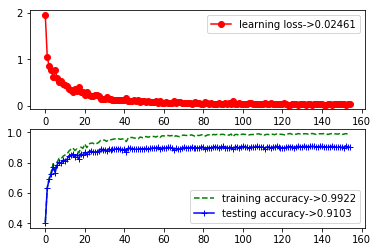

In [33]:
#drop prob1=drop prob2 = 1.0
loss_train,accuracy_train,accuracy_test = CNNtraining(kb = 0.9)
CNNdrawing(loss_train,accuracy_train,accuracy_test)

Add layer

Augmentation

functionalized

Batch Norm

Shrinked VGG

Adam optimizer(default)

dropoff

stop if 0.5% accracy improvement is not satisfied within 30 epoch